In [20]:
pip install pymupdf docling PyPDF2 -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
from pathlib import Path

from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    PdfPipelineOptions,
    TesseractCliOcrOptions,
)
from docling.document_converter import DocumentConverter, PdfFormatOption

In [101]:
def pdf_to_markdown(input_doc: Path, tesseract_path: str):
    ocr_options = TesseractCliOcrOptions(lang=["auto"], tesseract_cmd=tesseract_path)

    pipeline_options = PdfPipelineOptions(
        do_ocr=True,
        ocr_options=ocr_options,
        generate_page_images=True,
    )

    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_options=pipeline_options,
            )
        }
    )

    doc = converter.convert(input_doc).document
    md = doc.export_to_markdown()
    return doc


input_doc = Path("./data/1706.03762v7.pdf")  # 한국어 입력 안됨
tesseract_path = "C:/Program Files/Tesseract-OCR/tesseract.exe"
docs = pdf_to_markdown(input_doc=input_doc, tesseract_path=tesseract_path)

Tesseract detected the script 'Latin' and language 'Latin'. However this language is not installed in your system and will be ignored.
Tesseract detected the script 'Latin' and language 'Latin'. However this language is not installed in your system and will be ignored.
Tesseract detected the script 'Latin' and language 'Latin'. However this language is not installed in your system and will be ignored.


In [102]:
from docling_core.types.doc.base import ImageRefMode
image_mode = ImageRefMode.EMBEDDED
md = docs.export_to_markdown(image_placeholder="<!-- image -->", image_mode=image_mode)

DoclingDocument(schema_name='DoclingDocument', version='1.1.0', name='1706.03762v7', origin=DocumentOrigin(mimetype='application/pdf', binary_hash=2949302674760005271, filename='1706.03762v7.pdf', uri=None), furniture=GroupItem(self_ref='#/furniture', parent=None, children=[], content_layer=<ContentLayer.FURNITURE: 'furniture'>, name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>), body=GroupItem(self_ref='#/body', parent=None, children=[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/texts/4'), RefItem(cref='#/texts/5'), RefItem(cref='#/texts/6'), RefItem(cref='#/groups/0'), RefItem(cref='#/texts/11'), RefItem(cref='#/texts/12'), RefItem(cref='#/texts/13'), RefItem(cref='#/texts/14'), RefItem(cref='#/texts/15'), RefItem(cref='#/texts/16'), RefItem(cref='#/texts/17'), RefItem(cref='#/texts/18'), RefItem(cref='#/texts/19'), RefItem(cref='#/texts/20'), RefItem(cref='#/texts/21'), RefItem(cref='#/texts/22
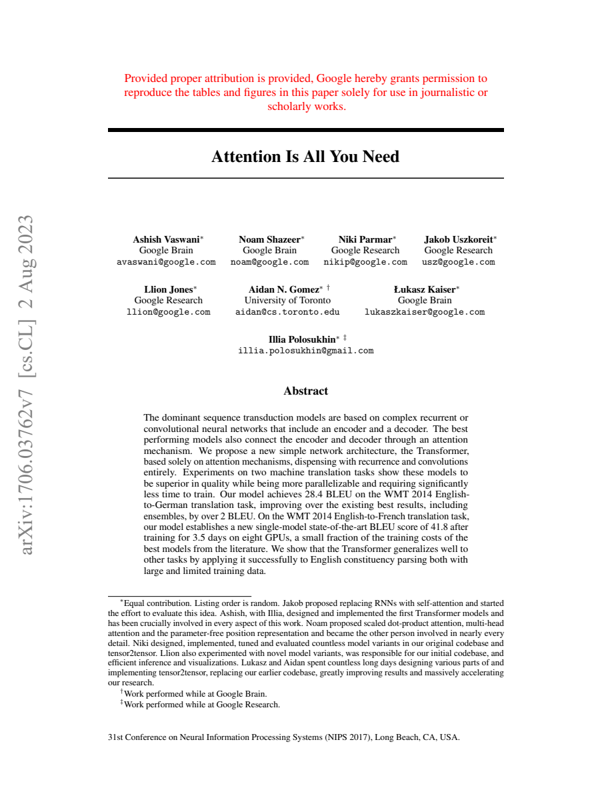
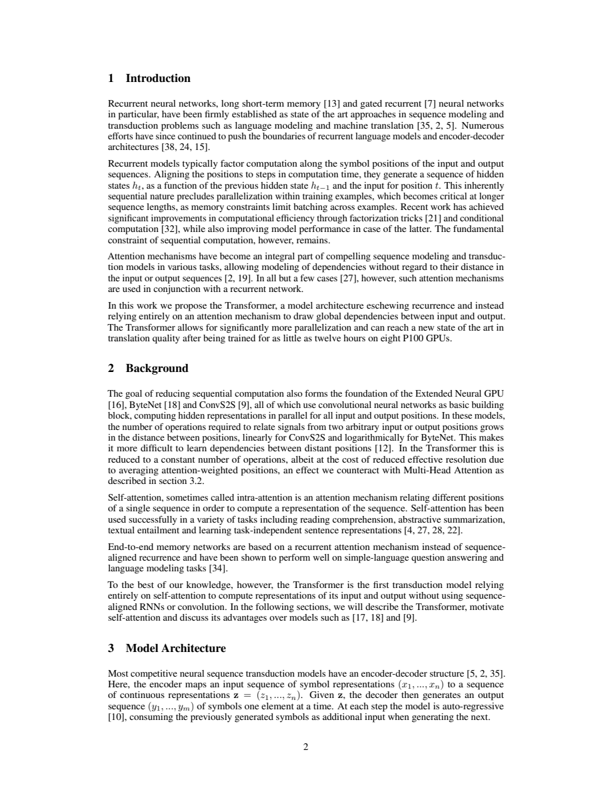
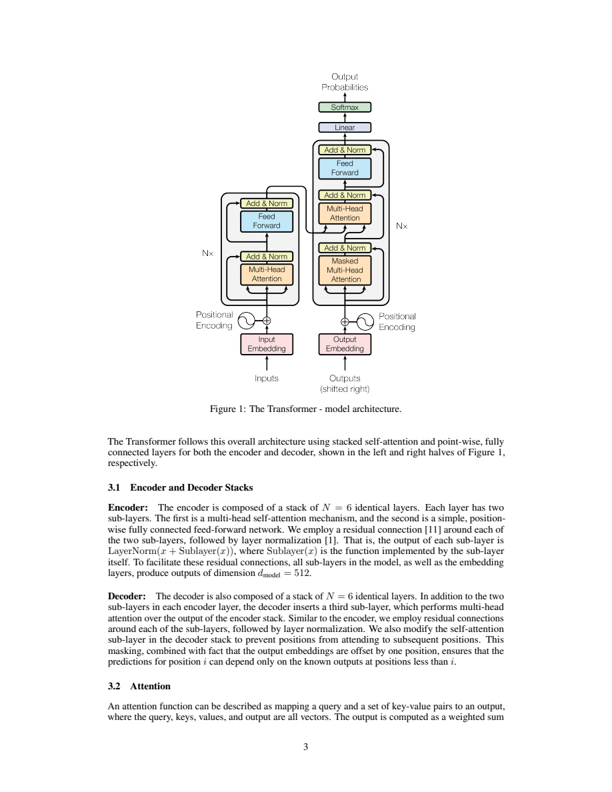
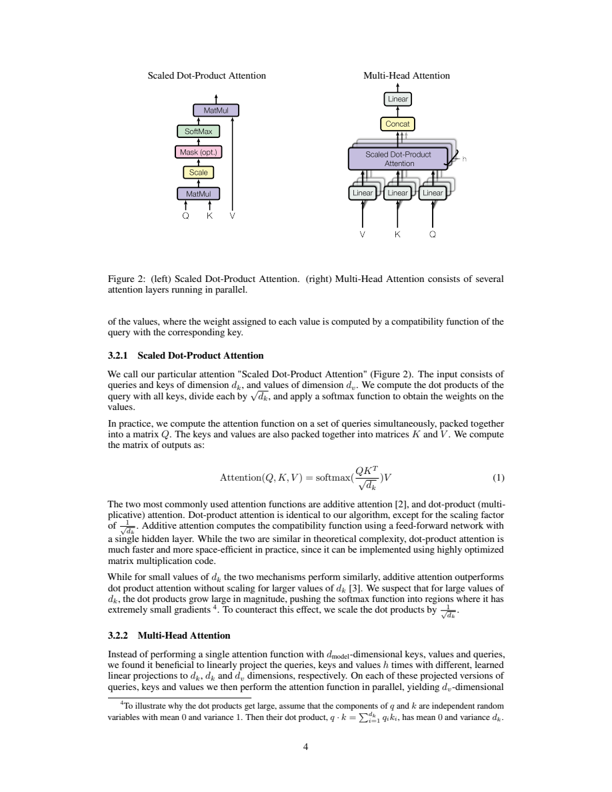
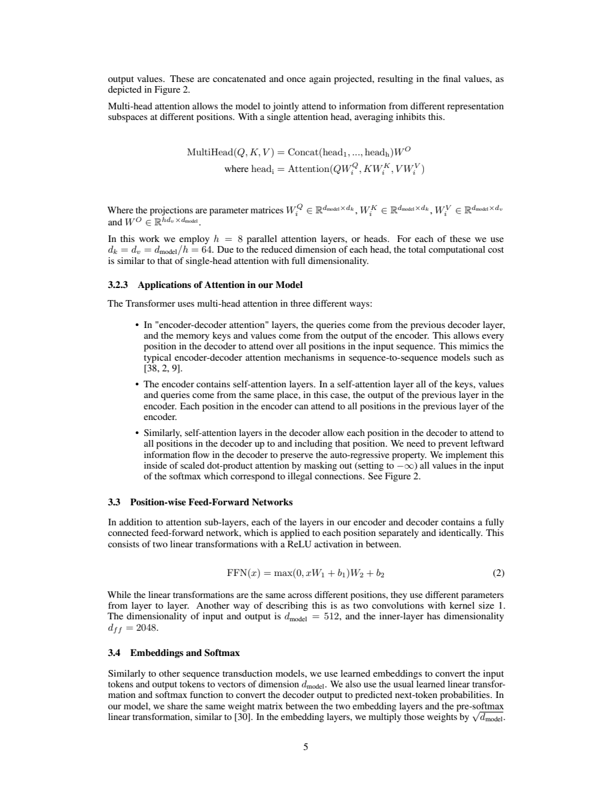
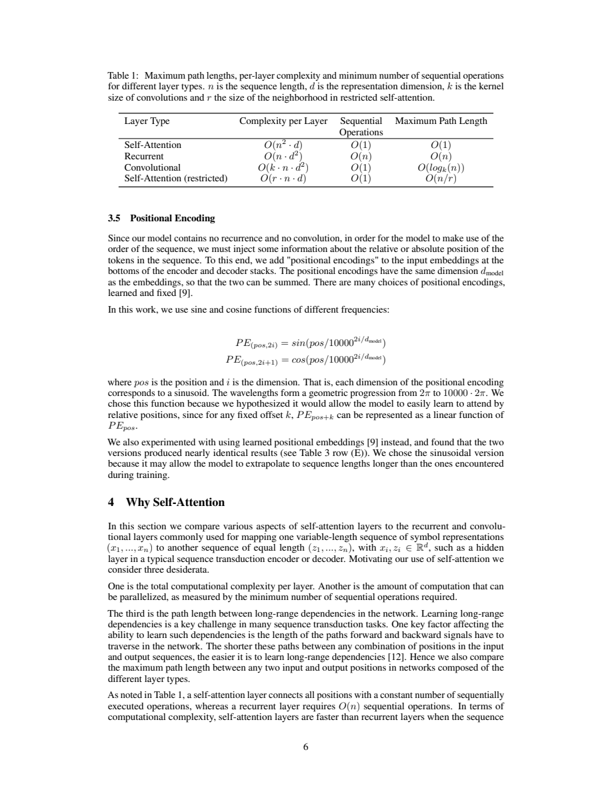
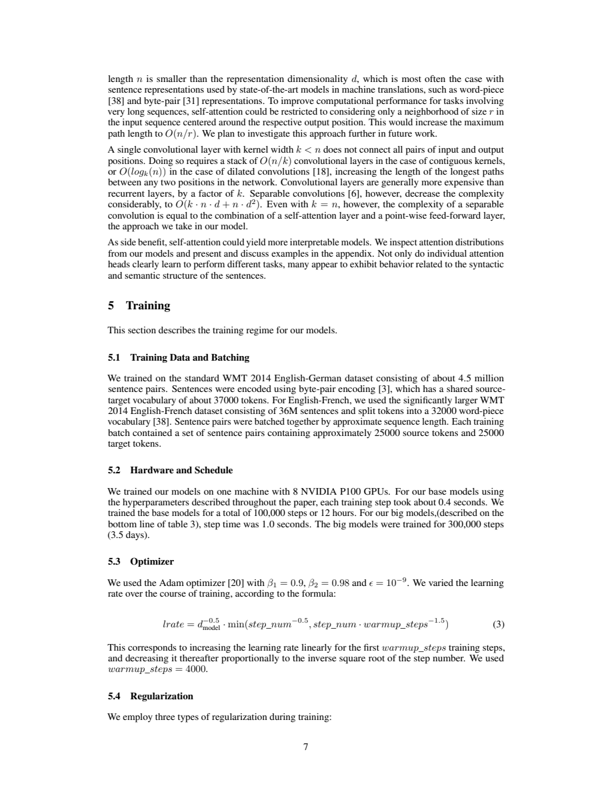
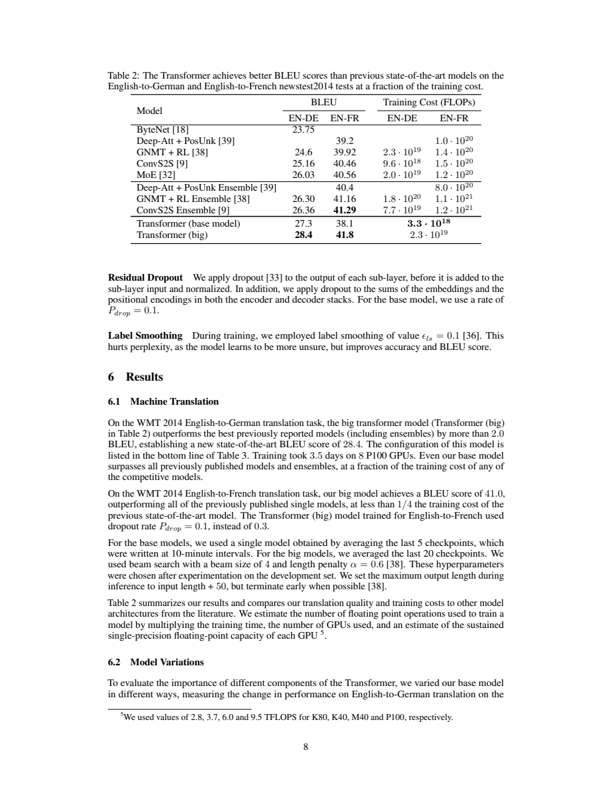
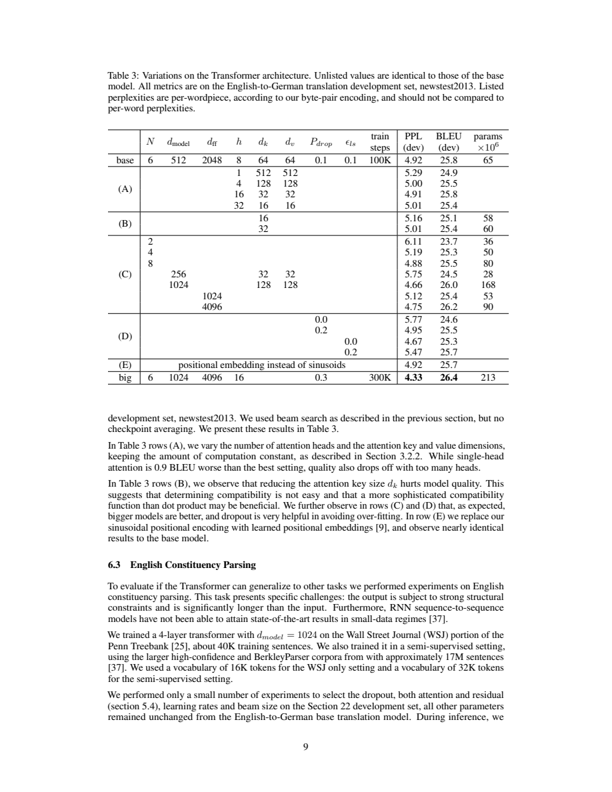
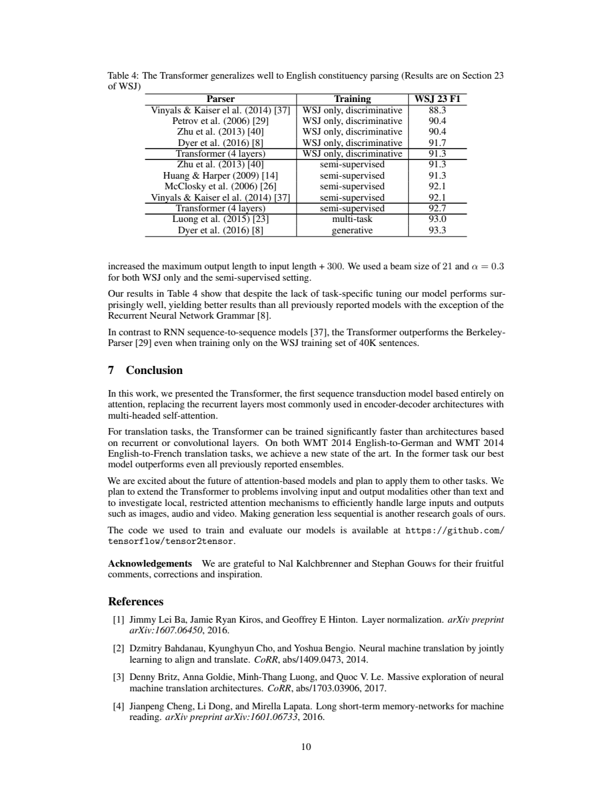
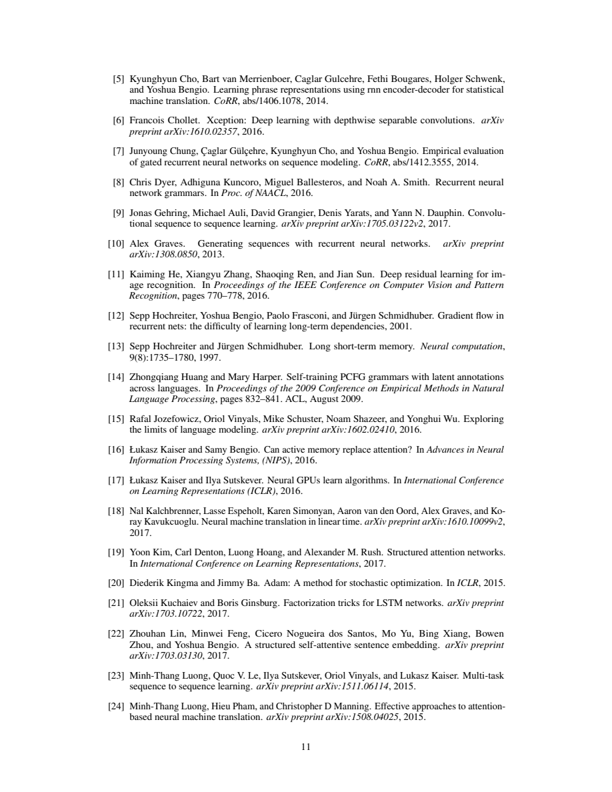
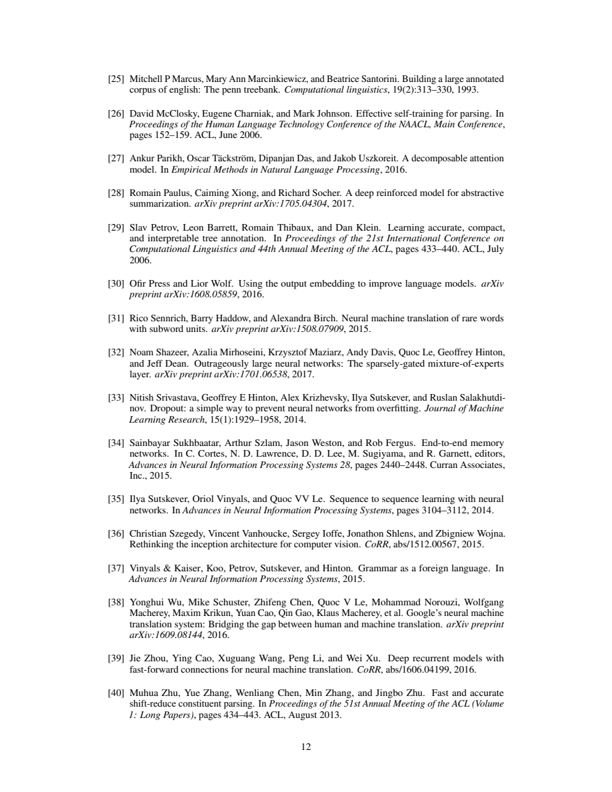
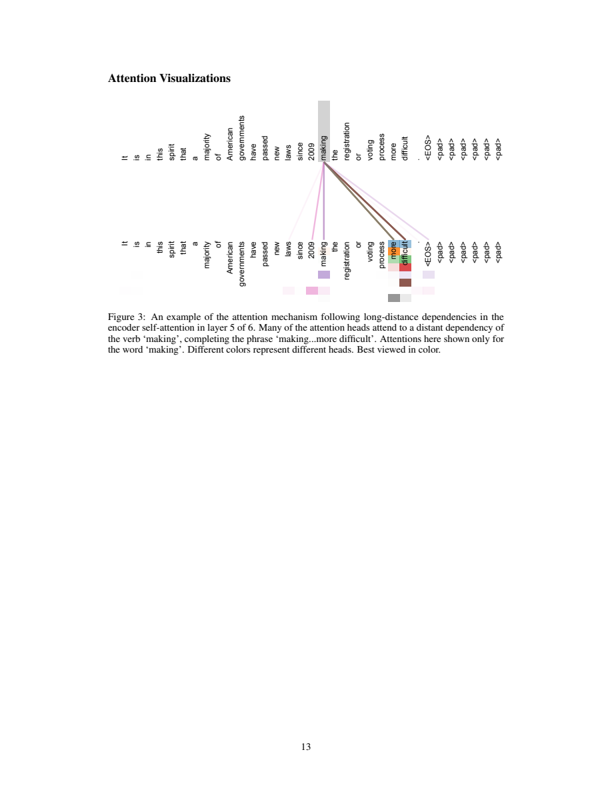
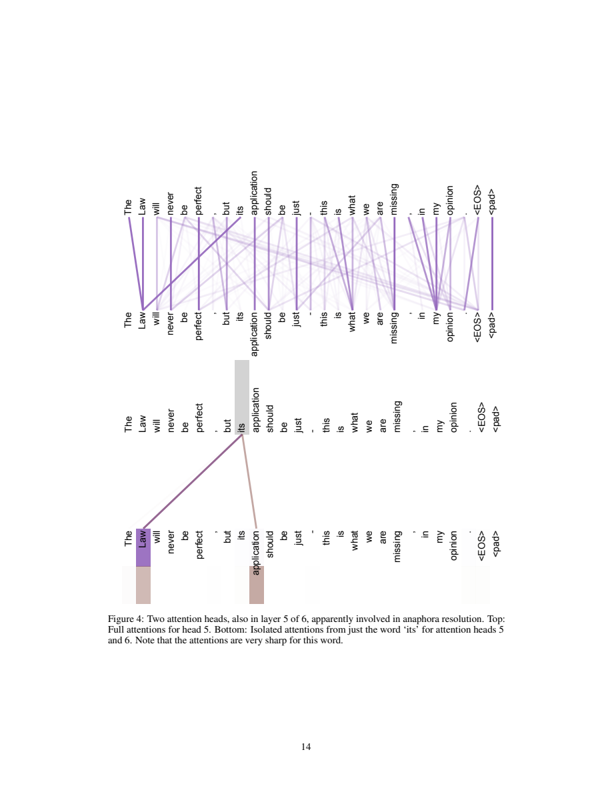
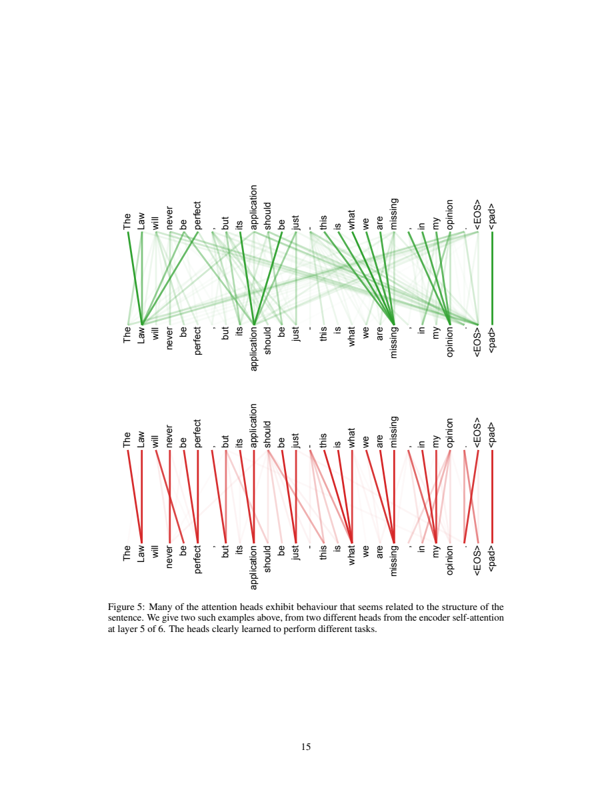

In [103]:
docs

In [104]:
for picture in docs.pictures:
    print(picture.prov)

[ProvenanceItem(page_no=3, bbox=BoundingBox(l=196.17906188964844, t=719.216796875, r=415.58917236328125, b=397.27667236328125, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 47))]
[ProvenanceItem(page_no=4, bbox=BoundingBox(l=175.1226806640625, t=697.697998046875, r=239.90184020996094, b=572.2972412109375, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))]
[ProvenanceItem(page_no=4, bbox=BoundingBox(l=346.8466491699219, t=720.5292358398438, r=467.6957092285156, b=553.0906982421875, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 133))]
[ProvenanceItem(page_no=13, bbox=BoundingBox(l=119.5811538696289, t=691.8294067382812, r=503.2312927246094, b=489.8687438964844, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 377))]
[ProvenanceItem(page_no=14, bbox=BoundingBox(l=120.50511932373047, t=621.9672241210938, r=501.60394287109375, b=186.96783447265625, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=

In [85]:
for i, page in enumerate(docs.pages.values()):
    with open(f"image_{i}", "wb") as f:
        f.write(page.image.uri)

TypeError: a bytes-like object is required, not 'AnyUrl'

In [69]:
window_size = 2
markdown = md

def extract_text_arround_images(window_size: int, markdown: str):
    lines = markdown.split("\n")
    image_positions = [i for i, line in enumerate(lines) if "<!-- image -->" in line]

    results = []
    for idx, pos in enumerate(image_positions):
        start_window = max(0, pos - window_size)
        end_window = min(len(lines), pos + window_size + 1)

        surrounding_text = "\n".join(lines[start_window:end_window])
        results.append(surrounding_text)
    return results


results = extract_text_arround_images(window_size, markdown)
for result in results:
    print(result)
    print()
    print("=" * 50)

Figure 1: The Transformer - model architecture.

<!-- image -->

The Transformer follows this overall architecture using stacked self-attention and point-wise, fully connected layers for both the encoder and decoder, shown in the left and right halves of Figure 1, respectively.

## Scaled Dot-Product Attention

<!-- image -->

Figure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several attention layers running in parallel.

Figure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several attention layers running in parallel.

<!-- image -->

of the values, where the weight assigned to each value is computed by a compatibility function of the query with the corresponding key.

Figure 3: An example of the attention mechanism following long-distance dependencies in the encoder self-attention in layer 5 of 6. Many of the attention heads attend to a distant dependency of the verb 'making', completing the phrase 'making...mor

In [ ]:
import fitz  # PyMuPDF
import os

# PDF 파일 경로
pdf_path = "your_pdf_file.pdf"
output_image_dir = "extracted_images"
window_size = 2  # 원하는 윈도우 사이즈로 설정

os.makedirs(output_image_dir, exist_ok=True)

# PDF 로드
doc = fitz.open(pdf_path)
image_count = 0

# 페이지별로 텍스트와 이미지를 동시 처리
for page_num in range(len(doc)):
    page = doc[page_num]

    # 텍스트를 줄 단위로 추출
    lines = page.get_text("text").split("\n")

    # `<-- image -->` 태그 위치 탐색
    image_positions = [i for i, line in enumerate(lines) if "<!-- image -->" in line]

    for pos in image_positions:
        # 윈도우 범위 계산
        start_window = max(0, pos - window_size)
        end_window = min(len(lines), pos + window_size + 1)

        # 윈도우 내 텍스트 추출
        surrounding_text = "\n".join(lines[start_window:end_window])
        print(surrounding_text)
        print("=" * 50)

        # 해당 페이지에서 이미지 추출
        for img_index, img in enumerate(page.get_images(full=True)):
            xref = img[0]  # 이미지 참조 번호
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]

            # 이미지 저장 경로 설정
            image_filename = f"image_{page_num}_{img_index}.{image_ext}"
            image_path = os.path.join(output_image_dir, image_filename)

            # 이미지 저장
            with open(image_path, "wb") as img_file:
                img_file.write(image_bytes)

            print(f"Saved Image: {image_filename}")
            image_count += 1

print(f"Total {image_count} images extracted.")